# Facial Expression Recognition
#### By Siddhart Goel

In [526]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix

### Angry

In [229]:
human_angry = glob.glob("../Data/Humans/Angry/*")
print("Number of images in Angry emotion = "+str(len(human_angry)))

Number of images in Angry emotion = 3995


In [230]:
human_angry_imageName = [str(i.split("\\")[-1]) for i in human_angry]
human_angry_folderName = [(human_angry[i].replace("\\"+str(human_angry_imageName[i]),"/")) for i in range(len(human_angry))]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)
len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(3995, 3995, 3995, 3995)

In [231]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Angry/,Training_10118481.jpg,Angry,1
1,../Data/Humans/Angry/,Training_10120469.jpg,Angry,1
2,../Data/Humans/Angry/,Training_10131352.jpg,Angry,1
3,../Data/Humans/Angry/,Training_10161559.jpg,Angry,1
4,../Data/Humans/Angry/,Training_1021836.jpg,Angry,1


### Disgust

In [232]:
human_disgust = glob.glob("../Data/Humans/Disgust/*")
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 436


In [233]:
human_disgust_imageName = [str(i.split("\\")[-1]) for i in human_disgust]
human_disgust_folderName = [(human_disgust[i].replace("\\"+str(human_disgust_imageName[i]),"/")) for i in range(len(human_disgust))]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(436, 436, 436, 436)

In [234]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Disgust/,Training_10371709.jpg,Disgust,2
1,../Data/Humans/Disgust/,Training_10598340.jpg,Disgust,2
2,../Data/Humans/Disgust/,Training_1070239.jpg,Disgust,2
3,../Data/Humans/Disgust/,Training_11050021.jpg,Disgust,2
4,../Data/Humans/Disgust/,Training_11550217.jpg,Disgust,2


### Fear

In [235]:
human_fear = glob.glob("../Data/Humans/Fear/*")
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 4097


In [236]:
human_fear_imageName = [str(i.split("\\")[-1]) for i in human_fear]
human_fear_folderName = [(human_fear[i].replace("\\"+str(human_fear_imageName[i]),"/")) for i in range(len(human_fear))]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(4097, 4097, 4097, 4097)

In [237]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Fear/,Training_10018621.jpg,Fear,3
1,../Data/Humans/Fear/,Training_10031494.jpg,Fear,3
2,../Data/Humans/Fear/,Training_10110501.jpg,Fear,3
3,../Data/Humans/Fear/,Training_10117992.jpg,Fear,3
4,../Data/Humans/Fear/,Training_10126156.jpg,Fear,3


### Happy

In [238]:
human_happy = glob.glob("../Data/Humans/Happy/*")
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 3819


In [239]:
human_happy_imageName = [str(i.split("\\")[-1]) for i in human_happy]
human_happy_folderName = [(human_happy[i].replace("\\"+str(human_happy_imageName[i]),"/")) for i in range(len(human_happy))]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(3819, 3819, 3819, 3819)

In [240]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Happy/,Training_47009669.jpg,Happy,4
1,../Data/Humans/Happy/,Training_47017843.jpg,Happy,4
2,../Data/Humans/Happy/,Training_47023842.jpg,Happy,4
3,../Data/Humans/Happy/,Training_47060033.jpg,Happy,4
4,../Data/Humans/Happy/,Training_47060911.jpg,Happy,4


### Neutral

In [241]:
human_neutral = glob.glob("../Data/Humans/Neutral/*")
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 4965


In [242]:
human_neutral_imageName = [str(i.split("\\")[-1]) for i in human_neutral]
human_neutral_folderName = [(human_neutral[i].replace("\\"+str(human_neutral_imageName[i]),"/")) for i in range(len(human_neutral))]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [5]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(4965, 4965, 4965, 4965)

In [243]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Neutral/,Training_10002154.jpg,Neutral,5
1,../Data/Humans/Neutral/,Training_10031781.jpg,Neutral,5
2,../Data/Humans/Neutral/,Training_10055498.jpg,Neutral,5
3,../Data/Humans/Neutral/,Training_10059941.jpg,Neutral,5
4,../Data/Humans/Neutral/,Training_10078021.jpg,Neutral,5


### Sad

In [244]:
human_sad = glob.glob("../Data/Humans/Sad/*")
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 4830


In [245]:
human_sad_imageName = [str(i.split("\\")[-1]) for i in human_sad]
human_sad_folderName = [(human_sad[i].replace("\\"+str(human_sad_imageName[i]),"/")) for i in range(len(human_sad))]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [6]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(4830, 4830, 4830, 4830)

In [246]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Sad/,Training_10022789.jpg,Sad,6
1,../Data/Humans/Sad/,Training_10031481.jpg,Sad,6
2,../Data/Humans/Sad/,Training_10048646.jpg,Sad,6
3,../Data/Humans/Sad/,Training_10057152.jpg,Sad,6
4,../Data/Humans/Sad/,Training_10091569.jpg,Sad,6


### Surprise

In [247]:
human_surprise = glob.glob("../Data/Humans/Surprise/*")
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 3171


In [248]:
human_surprise_imageName = [str(i.split("\\")[-1]) for i in human_surprise]
human_surprise_folderName = [(human_surprise[i].replace("\\"+str(human_surprise_imageName[i]),"/")) for i in range(len(human_surprise))]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [7]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(3171, 3171, 3171, 3171)

In [249]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Surprise/,Training_10013223.jpg,Surprise,7
1,../Data/Humans/Surprise/,Training_1002457.jpg,Surprise,7
2,../Data/Humans/Surprise/,Training_10028230.jpg,Surprise,7
3,../Data/Humans/Surprise/,Training_10060820.jpg,Surprise,7
4,../Data/Humans/Surprise/,Training_10073433.jpg,Surprise,7


### Pain

In [250]:
human_pain = glob.glob("../Data/Humans/Pain/*")
print("Number of images in Pain emotion = "+str(len(human_pain)))

Number of images in Pain emotion = 552


In [251]:
human_pain_imageName = [str(i.split("\\")[-1]) for i in human_pain]
human_pain_folderName = [(human_pain[i].replace("\\"+str(human_pain_imageName[i]),"/")) for i in range(len(human_pain))]
human_pain_emotion = [["Pain"]*len(human_pain)][0]
human_pain_label = [8]*len(human_pain)

len(human_pain_folderName), len(human_pain_imageName), len(human_pain_emotion), len(human_pain_label)

(552, 552, 552, 552)

In [252]:
df_pain = pd.DataFrame()
df_pain["folderName"] = human_pain_folderName
df_pain["imageName"] = human_pain_imageName
df_pain["Emotion"] = human_pain_emotion
df_pain["Labels"] = human_pain_label
df_pain.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Pain/,f1-45.jpg,Pain,8
1,../Data/Humans/Pain/,f10a1.jpg,Pain,8
2,../Data/Humans/Pain/,f10a2.jpg,Pain,8
3,../Data/Humans/Pain/,f10d1.jpg,Pain,8
4,../Data/Humans/Pain/,f10d2.jpg,Pain,8


In [253]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_neutral.shape[0] + df_sad.shape[0] + df_surprise.shape[0] + df_pain.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 25865


### Concatenating all dataframes

In [254]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise, df_pain]
Final_human = pd.concat(frames)
Final_human.shape

(25865, 4)

In [255]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.sample(5)

,folderName,imageName,Emotion,Labels
20137,../Data/Humans/Angry/,Training_71939703.jpg,Angry,1
11064,../Data/Humans/Neutral/,Training_47193693.jpg,Neutral,5
19539,../Data/Humans/Happy/,Training_73708771.jpg,Happy,4
2693,../Data/Humans/Happy/,Training_85546096.jpg,Happy,4
9329,../Data/Humans/Sad/,Training_58158149.jpg,Sad,6


In [256]:
df_human_train_data, df_human_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.197860)
df_human_train, df_human_cv = train_test_split(df_human_train_data, stratify=df_human_train_data["Labels"], test_size = 0.166666)
df_human_train.shape, df_human_cv.shape, df_human_test.shape 

((17289, 4), (3458, 4), (5118, 4))

In [419]:
df_human_train.reset_index(inplace = True, drop = True)
df_human_train.to_pickle("../Data/Dataframes/df_human_train.pkl")

df_human_cv.reset_index(inplace = True, drop = True)
df_human_cv.to_pickle("../Data/Dataframes/df_human_cv.pkl")

df_human_test.reset_index(inplace = True, drop = True)
df_human_test.to_pickle("../Data/Dataframes/df_human_test.pkl")

In [420]:
df_human_train = pd.read_pickle("..\Data\Dataframes\df_human_train.pkl")
df_human_train.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Fear/,Training_45817788.jpg,Fear,3
1,../Data/Humans/Sad/,Training_49148848.jpg,Sad,6
2,../Data/Humans/Neutral/,Training_57334138.jpg,Neutral,5
3,../Data/Humans/Sad/,Training_3250157.jpg,Sad,6
4,../Data/Humans/Fear/,Training_91825354.jpg,Fear,3


In [421]:
df_human_train.shape

(17289, 4)

In [422]:
df_human_cv = pd.read_pickle("../Data/Dataframes/df_human_cv.pkl")
df_human_cv.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Sad/,Training_11569849.jpg,Sad,6
1,../Data/Humans/Sad/,Training_38444438.jpg,Sad,6
2,../Data/Humans/Disgust/,Training_24592307.jpg,Disgust,2
3,../Data/Humans/Fear/,Training_93925872.jpg,Fear,3
4,../Data/Humans/Angry/,Training_26083913.jpg,Angry,1


In [423]:
df_human_cv.shape

(3458, 4)

In [424]:
df_human_test = pd.read_pickle("../Data/Dataframes/df_human_test.pkl")
df_human_test.head()

,folderName,imageName,Emotion,Labels
0,../Data/Humans/Surprise/,Training_90190497.jpg,Surprise,7
1,../Data/Humans/Happy/,Training_66036835.jpg,Happy,4
2,../Data/Humans/Sad/,Training_95029336.jpg,Sad,6
3,../Data/Humans/Neutral/,Training_92082348.jpg,Neutral,5
4,../Data/Humans/Angry/,Training_8601269.jpg,Angry,1


In [425]:
df_human_test.shape

(5118, 4)

In [426]:
pain_df = df_human_train[ (df_human_train["Labels"]==8)]
pain_df.shape

(369, 4)

## 3. Analysing Data of Human Images
### Distribution of class labels in Train, CV and Test

In [265]:
df_temp_train = df_human_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

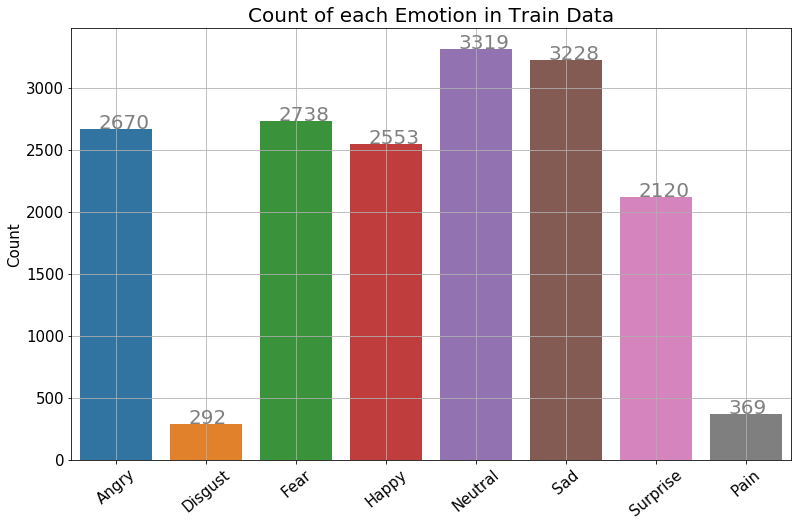

Number of training data points in class Neutral = 3319(19.1972%)
Number of training data points in class Sad = 3228(18.6708%)
Number of training data points in class Fear = 2738(15.8367%)
Number of training data points in class Angry = 2670(15.4433%)
Number of training data points in class Happy = 2553(14.7666%)
Number of training data points in class Surprise = 2120(12.2621%)
Number of training data points in class Pain = 369(2.1343%)
Number of training data points in class Disgust = 292(1.6889%)
--------------------------------------------------------------------------------


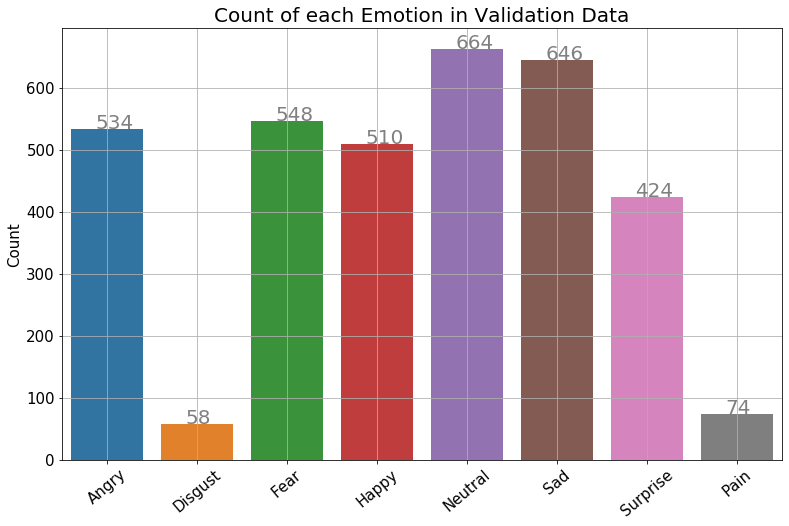

Number of training data points in class Neutral = 664(19.2019%)
Number of training data points in class Sad = 646(18.6813%)
Number of training data points in class Fear = 548(15.8473%)
Number of training data points in class Angry = 534(15.4425%)
Number of training data points in class Happy = 510(14.7484%)
Number of training data points in class Surprise = 424(12.2614%)
Number of training data points in class Pain = 74(2.14%)
Number of training data points in class Disgust = 58(1.6773%)
--------------------------------------------------------------------------------


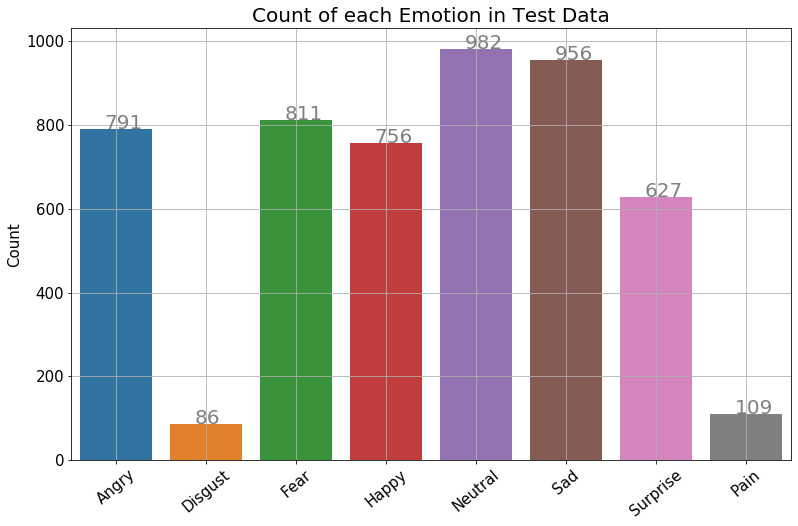

Number of training data points in class Neutral = 982(19.1872%)
Number of training data points in class Sad = 956(18.6792%)
Number of training data points in class Fear = 811(15.846%)
Number of training data points in class Angry = 791(15.4553%)
Number of training data points in class Happy = 756(14.7714%)
Number of training data points in class Surprise = 627(12.2509%)
Number of training data points in class Pain = 109(2.1297%)
Number of training data points in class Disgust = 86(1.6803%)


In [266]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 4. Pre-Processing Human Images

### 4.1 Converting all the images to grayscale and save them

In [267]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [205]:
convt_to_gray(df_human_train)

Total number of images converted and saved = 17289


In [206]:
convt_to_gray(df_human_cv)

Total number of images converted and saved = 3458


In [207]:
convt_to_gray(df_human_test)

Total number of images converted and saved = 5118


### 4.2 Detecting face in image using HAAR then crop it then resize then save the image

In [412]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it. 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(path):
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier(r'C:\Users\SIDDHARTH GOEL\OneDrive\Desktop\FCR\final code\haarcascade_frontalface_default.xml')
    img = cv2.imread(path)
    img = cv2.resize(img, (48, 48))
    cv2.imwrite(path, img)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, face_clip)

In [415]:
for i, d in df_human_train.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path) 

In [416]:
for i, d in df_human_cv.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [417]:
for i, d in df_human_test.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

## 10. Creating bottleneck features from VGG-16 model. Here, we are using Transfer learning.

In [427]:
Train_Combined = pd.read_pickle("..\Data\Dataframes\df_human_train.pkl")
CV_Humans = pd.read_pickle("..\Data\Dataframes\df_human_cv.pkl")
Test_Humans = pd.read_pickle("..\Data\Dataframes\df_human_test.pkl")

Train_Combined.shape, CV_Humans.shape, Test_Humans.shape

((17289, 4), (3458, 4), (5118, 4))

In [428]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
TestHumans_batch_pointer = 0

## 10.1 Bottleneck features for Final Train data

In [467]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

C:\Users\SIDDHARTH GOEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(17289, 8)

In [480]:
TrainCombined_batch_pointer = 0
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image.resize((48, 48 ,3))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [483]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
batch_size = 50
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### Bottleneck features for CV Human

In [485]:
CVHumans_Labels = pd.get_dummies(CV_Humans["Labels"]).as_matrix()
CVHumans_Labels.shape

C:\Users\SIDDHARTH GOEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(3458, 8)

In [486]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Humans.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_Humans.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image.resize((48, 48 ,3))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [487]:
#creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"
batch_size = 50
for i in range(int(len(CV_Humans)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### Bottleneck Features for Test Human Data

In [488]:
TestHuman_Labels = pd.get_dummies(Test_Humans["Labels"]).as_matrix()
TestHuman_Labels.shape

C:\Users\SIDDHARTH GOEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(5118, 8)

In [489]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Humans.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_Humans.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image.resize((48, 48 ,3))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [490]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestHumans_Labels/"
batch_size = 50
for i in range(int(len(Test_Humans)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

leftover_points = len(Test_Humans) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_Humans)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_Humans)/batch_size) + 1)), bottleneck_features)

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

## Modelling & Training

In [491]:
no_of_classes = 8

In [492]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [493]:
#training the model
SAVEDIR_COMB_TRAIN = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"

SAVER = "../Data/Model_Save/"

input_shape = 512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 50
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_Humans) / batch_size)
combTrain_bottleneck_files,CVHuman_bottleneck_files

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                

C:\Users\SIDDHARTH GOEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=8)`
  


(345, 69)

In [495]:
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc = [], [], [], [], []
for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc = 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        step += 1
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
        
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch

        print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {} ".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
       
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {} ".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))

Epoch: 1, Step: 346, CombTr_Loss: 2.65, CombTr_Acc: 0.08, CVHum_Loss: 2.06, CVHum_Acc: 0.16 
Epoch: 1, Step: 347, CombTr_Loss: 2.43, CombTr_Acc: 0.12, CVHum_Loss: 2.25, CVHum_Acc: 0.04 
Epoch: 1, Step: 348, CombTr_Loss: 2.57, CombTr_Acc: 0.12, CVHum_Loss: 2.13, CVHum_Acc: 0.06 
Epoch: 1, Step: 349, CombTr_Loss: 2.52, CombTr_Acc: 0.06, CVHum_Loss: 2.22, CVHum_Acc: 0.1 
Epoch: 1, Step: 350, CombTr_Loss: 2.31, CombTr_Acc: 0.12, CVHum_Loss: 2.13, CVHum_Acc: 0.04 
Epoch: 1, Step: 351, CombTr_Loss: 2.39, CombTr_Acc: 0.16, CVHum_Loss: 2.15, CVHum_Acc: 0.1 
Epoch: 1, Step: 352, CombTr_Loss: 2.1, CombTr_Acc: 0.26, CVHum_Loss: 2.18, CVHum_Acc: 0.16 
Epoch: 1, Step: 353, CombTr_Loss: 2.01, CombTr_Acc: 0.24, CVHum_Loss: 2.07, CVHum_Acc: 0.18 
Epoch: 1, Step: 354, CombTr_Loss: 2.12, CombTr_Acc: 0.3, CVHum_Loss: 2.08, CVHum_Acc: 0.12 
Epoch: 1, Step: 355, CombTr_Loss: 2.39, CombTr_Acc: 0.04, CVHum_Loss: 2.24, CVHum_Acc: 0.06 
Epoch: 1, Step: 356, CombTr_Loss: 2.41, CombTr_Acc: 0.16, CVHum_Loss: 2.07

In [497]:
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy" ])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
log_frame.to_csv("../Data/Logs/Log.csv", index = False)

In [498]:
log = pd.read_csv("../Data/Logs/Log.csv")
log

,Epoch,Comb_Train_Loss,Comb_Train_Accuracy,CVHuman_Loss,CVHuman_Accuracy
0,1,1.801509,0.277217,1.886042,0.236638
1,2,1.685807,0.331014,1.770282,0.294725
2,3,1.646218,0.346725,1.750570,0.310783
3,4,1.606674,0.364000,1.770343,0.312580
4,5,1.578341,0.375884,1.750646,0.313043
5,6,1.546278,0.394087,1.704748,0.326493
6,7,1.510768,0.406609,1.721530,0.328174
7,8,1.481824,0.419768,1.720514,0.335420
8,9,1.446982,0.432348,1.722421,0.337043
9,10,1.411069,0.449159,1.758579,0.331768


In [499]:
def plotting(epoch, train_loss, CVHuman_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

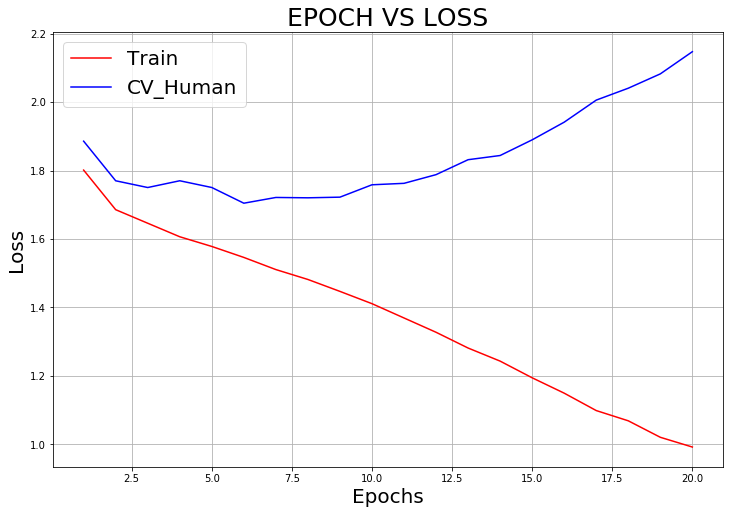

In [500]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), "EPOCH VS LOSS")

In [501]:
def plotting(epoch, train_acc, CVHuman_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

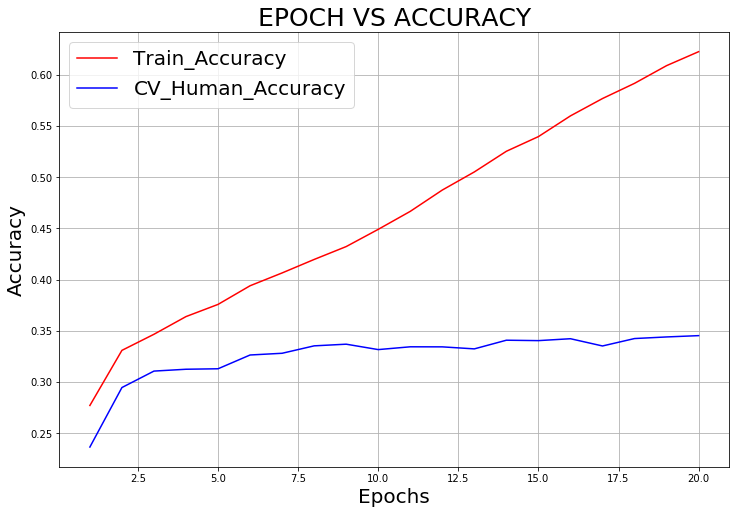

In [502]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), "EPOCH VS ACCURACY")

## Testing on Real World with Still Images

In [503]:
# Now for testing the model on real world images we have to follow all of the same steps which we have done on our training, CV
# and test images. Like here we have to first pre-preocess our images then create its VGG-16 bottleneck features then pass those 
# bottleneck features through our own MLP model for prediction.
# Steps are as follows:
# 1. Read the image, convert it to grayscale and save it.
# 2. Read that grayscale saved image, the detect face in it using HAAR cascade.
# 3. Crop the image to the detected face and resize it to 350*350 and save the image.
# 4. Read that processed cropped-resized image, then reshape it and normalize it.
# 5. Then feed that image to VGG-16 and create bottleneck features of that image and then reshape it.
# 6. Then use our own model for final prediction of expression.

In [504]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE",8:"PAIN"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("../Data/Model_Save/model.h5")

In [505]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]
        cv2.imwrite(path, cv2.resize(face_clip, (48, 48)))
    
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/25.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() + 1
    print("Predicted Expression Probabilities")
    print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\nPAIN: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6], top_pred[0][7]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

# Testing

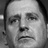

In [506]:
Image.open("../Data/Test/test1.jpg")

In [507]:
make_prediction("../Data/Test/test1.jpg")

Predicted Expression Probabilities
ANGRY: 0.5011460185050964
DISGUST: 7.556018885074085e-25
FEAR: 0.40846365690231323
HAPPY: 5.160607184639954e-13
NEUTRAL: 0.09038113057613373
SAD: 9.14750125957653e-06
SURPRISE: 2.6224636342234025e-23
PAIN: 0.0


Dominant Probability = ANGRY: 0.501146


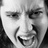

In [518]:
Image.open("../Data/Test/test2.jpg")

In [519]:
make_prediction("../Data/Test/test2.jpg")

Predicted Expression Probabilities
ANGRY: 0.004074513912200928
DISGUST: 4.4642271108084886e-13
FEAR: 0.13249272108078003
HAPPY: 1.6985536888114439e-07
NEUTRAL: 0.8611282110214233
SAD: 0.0023043607361614704
SURPRISE: 6.198796684286911e-12
PAIN: 2.267895246768723e-16


Dominant Probability = NEUTRAL: 0.8611282


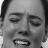

In [520]:
Image.open("../Data/Test/pain.jpg")

In [521]:
make_prediction("../Data/Test/pain.jpg")

Predicted Expression Probabilities
ANGRY: 0.0006658844649791718
DISGUST: 8.82831676686513e-14
FEAR: 0.9810816645622253
HAPPY: 0.0001393859420204535
NEUTRAL: 0.0027486588805913925
SAD: 0.015364337712526321
SURPRISE: 4.2434117200965127e-13
PAIN: 1.7273054575178508e-23


Dominant Probability = FEAR: 0.98108166


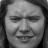

In [522]:
Image.open("../Data/Test/pain2.jpg")

In [523]:
make_prediction("../Data/Test/pain2.jpg")

Predicted Expression Probabilities
ANGRY: 0.0002111065259668976
DISGUST: 6.80634298921845e-11
FEAR: 0.005659537389874458
HAPPY: 3.408640054658463e-07
NEUTRAL: 0.9920576214790344
SAD: 0.002071431605145335
SURPRISE: 1.1987858622442005e-11
PAIN: 1.984844860675489e-17


Dominant Probability = NEUTRAL: 0.9920576


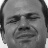

In [524]:
Image.open("../Data/Test/pain3.jpg")

In [525]:
make_prediction("../Data/Test/pain3.jpg")

Predicted Expression Probabilities
ANGRY: 4.5682682636716265e-10
DISGUST: 8.538245083604484e-29
FEAR: 1.6262578128589666e-07
HAPPY: 0.009992771781980991
NEUTRAL: 0.9900070428848267
SAD: 7.139872337802444e-08
SURPRISE: 7.599765718403407e-18
PAIN: 1.7665092421483596e-37


Dominant Probability = NEUTRAL: 0.99000704
